   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0  -1.322458   1.748113  -1.351074  -1.445921   1.792659  -2.741316       0
1   0.054934   0.695617  -1.245717   0.073310   0.550877  -1.326263       1
2   1.857702  -0.839524   1.497432   1.324024  -1.018612   1.087993       1
3  -1.751829  -0.215598  -1.154363   2.777598  -0.872098  -0.605270       0
4  -0.009300   0.220160   0.000207  -0.677684   0.349892  -0.165382       0
         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.000416     0.021475    -0.012107    -0.048433     0.029704   
std       1.003111     0.818102     1.009586     1.322137     0.858969   
min      -2.991136    -2.787107    -3.019512    -3.836929    -3.281236   
25%      -0.710385    -0.517717    -0.695964    -1.021008    -0.456377   
50%       0.000185     0.128403     0.003796    -0.224366     0.050139   
75%       0.665780     0.5

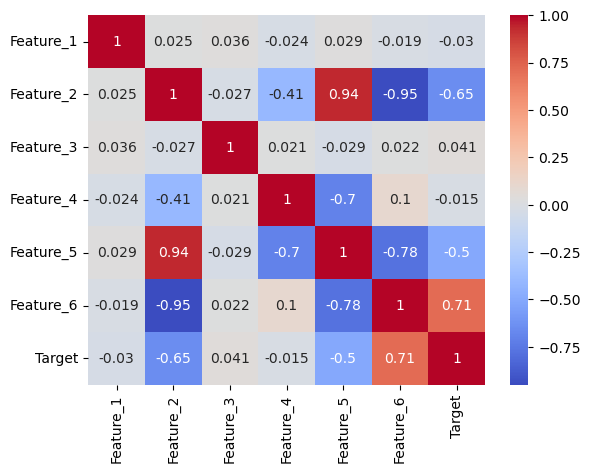

KeyError: 'target'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

df = pd.read_csv(r"C:\Users\madha\Downloads\Day 55 Ensemble_Techniques_XGBM_Data (1).csv")

print(df.head())
print(df.describe())
print(df.isnull().sum())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
best_xgb_precision = precision_score(y_test, y_pred_best_xgb)
best_xgb_recall = recall_score(y_test, y_pred_best_xgb)
best_xgb_f1 = f1_score(y_test, y_pred_best_xgb)
best_xgb_auc = roc_auc_score(y_test, y_pred_best_xgb)

print(f'Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}, AUC: {rf_auc}')
print(f'XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}, AUC: {xgb_auc}')
print(f'Best XGBoost - Accuracy: {best_xgb_accuracy}, Precision: {best_xgb_precision}, Recall: {best_xgb_recall}, F1-Score: {best_xgb_f1}, AUC: {best_xgb_auc}')
